In [121]:
%matplotlib notebook
import pandas as pd
import h5py
from cartopy import crs as ccrs
from matplotlib import pyplot as plt


In [122]:
f = h5py.File("data/198903253/SMAP_L3_SM_P_E_20201230_R17000_001.h5", "r")

In [123]:
list(f.keys())
# Got datasets 'Soil_Moisture_Retrieval_Data_AM' and 
#              'Soil_Moisture_Retrieval_Data_PM'

['Metadata',
 'Soil_Moisture_Retrieval_Data_AM',
 'Soil_Moisture_Retrieval_Data_PM']

In [157]:
data_am = f['Soil_Moisture_Retrieval_Data_AM']
data_pm = f['Soil_Moisture_Retrieval_Data_PM']

In [161]:
list(data_am.keys())
list(data_pm.keys())

['EASE_column_index_pm',
 'EASE_row_index_pm',
 'albedo_dca_pm',
 'albedo_pm',
 'albedo_scah_pm',
 'albedo_scav_pm',
 'boresight_incidence_pm',
 'bulk_density_pm',
 'clay_fraction_pm',
 'freeze_thaw_fraction_pm',
 'grid_surface_status_pm',
 'latitude_centroid_pm',
 'latitude_pm',
 'longitude_centroid_pm',
 'longitude_pm',
 'radar_water_body_fraction_pm',
 'retrieval_qual_flag_dca_pm',
 'retrieval_qual_flag_pm',
 'retrieval_qual_flag_scah_pm',
 'retrieval_qual_flag_scav_pm',
 'roughness_coefficient_dca_pm',
 'roughness_coefficient_pm',
 'roughness_coefficient_scah_pm',
 'roughness_coefficient_scav_pm',
 'soil_moisture_dca_pm',
 'soil_moisture_error_pm',
 'soil_moisture_pm',
 'soil_moisture_scah_pm',
 'soil_moisture_scav_pm',
 'static_water_body_fraction_pm',
 'surface_flag_pm',
 'surface_temperature_pm',
 'surface_water_fraction_mb_h_pm',
 'surface_water_fraction_mb_v_pm',
 'tb_3_corrected_pm',
 'tb_4_corrected_pm',
 'tb_h_corrected_pm',
 'tb_h_uncorrected_pm',
 'tb_qual_flag_3_pm',
 't

In [175]:
# Get Datasets
lat = np.array(data_am["latitude"]).flatten()
lon = np.array(data_am["longitude"]).flatten()
temperature = np.array(data_am["surface_temperature"]).flatten()

lat2 = np.array(data_pm["latitude_pm"]).flatten()
lon2 = np.array(data_pm["longitude_pm"]).flatten()
temperature2 = np.array(data_pm["surface_temperature_pm"]).flatten()

lat = np.concatenate((lat, lat2))
lon = np.concatenate((lon, lon2))
temperature = np.concatenate((temperature, temperature2))

In [176]:
df = pd.DataFrame(data={"latitude":lat.T, "longitude":lon.T, "temperature":temperature.T})

In [177]:
df = df[df["temperature"] != -9999.0]

<IPython.core.display.Javascript object>


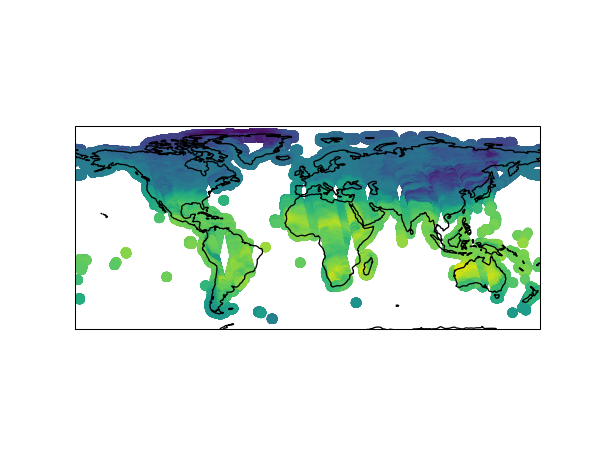

In [178]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

In [179]:
plt.scatter(df["longitude"],df["latitude"], c=df["temperature"])

In [180]:
plt.show()